# Explore here

It's recommended to use this notebook for exploration purposes.

In [6]:
!pip install pandas requests

In [1]:
import requests
import time
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}
response = requests.get(url, headers=headers).text

soup = BeautifulSoup(response, 'html')


In [3]:
tables = soup.find_all('table', class_="historical_data_table")

In [4]:
for i, table in enumerate(tables):
    if ('Tesla Quarterly Revenue' in str(table)):
        df_index = i

In [5]:
import pandas as pd

In [6]:
tesla_df = pd.DataFrame(columns=['date', 'revenue'])
for row in tables[df_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_df = pd.concat([tesla_df, pd.DataFrame({'date': date, 'revenue': revenue}, index=[0])], ignore_index=True)

In [7]:
tesla_df.head()

,date,revenue
0,2023-06-30,24927
1,2023-03-31,23329
2,2022-12-31,24318
3,2022-09-30,21454
4,2022-06-30,16934


In [8]:
tesla_df=tesla_df[tesla_df['revenue'] != ""]

In [14]:
import sqlite3

In [15]:
#create connection
connection = sqlite3.connect("tesla.db")


In [16]:
#create table
connection.execute('''CREATE TABLE revenue
                   (date NUMERIC,
                   revenue NUMERIC)''')

OperationalError: table revenue already exists

In [ ]:
#populate table
tesla_df.to_sql('revenue', connection, if_exists='replace', index=False)
connection.commit()

In [ ]:
query = 'SELECT * FROM revenue'
for row in connection.execute(query):
    print(row)

('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-31', '306')
('2012-09-30

**Plots**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Casting datatypes to datetime and integer
tesla_df['date'] = pd.to_datetime(tesla_df['date'], format='%Y-%m-%d')
tesla_df['revenue'] = pd.to_numeric(tesla_df['revenue'], downcast='integer')

*Lineplot*

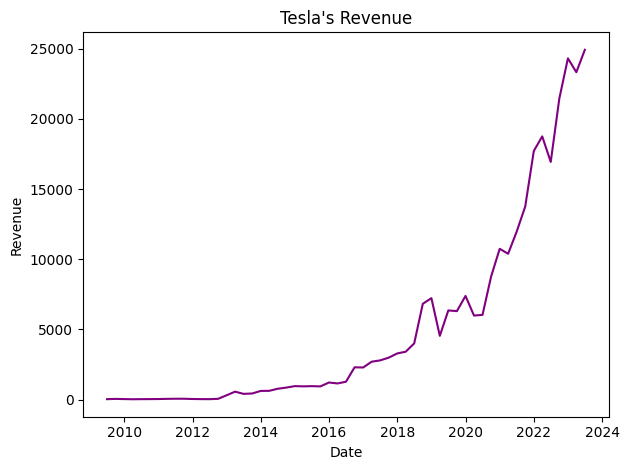

In [35]:
#plt.figure(figsize = (8, 4))
#plt.plot(tesla_df.date, tesla_df.revenue, color='purple')
lineplot = sns.lineplot(x='date', y='revenue', data=tesla_df, color='purple')
plt.title("Tesla's Revenue")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show();

*Barplot*

In [44]:
annual_revenue = tesla_df.groupby(tesla_df['date'].dt.year)['revenue'].sum()

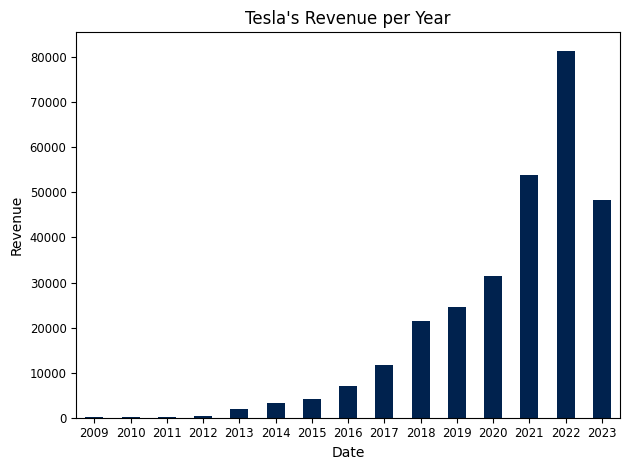

In [ ]:
annual_revenue.plot(kind='bar', colormap='cividis')
plt.title("Tesla's Revenue per Year")
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=0, fontsize='small')
plt.yticks(fontsize='small')
plt.tight_layout()
plt.show();

In [12]:
df_stacked = tesla_df.copy()

In [13]:
df_stacked['year'] = df_stacked['date'].dt.year
df_stacked['month'] = df_stacked['date'].dt.month

In [26]:
df_stacked.head()
df_stacked['month'].replace(6, 'Q2', inplace=True)
df_stacked['month'].replace(3, 'Q1', inplace=True)
df_stacked['month'].replace(9, 'Q3', inplace=True)
df_stacked['month'].replace(12, 'Q4', inplace=True)

In [27]:
stacked = df_stacked.groupby(['year', 'month'])['revenue'].sum().unstack()

In [28]:
stacked

month,Q1,Q2,Q3,Q4
year,,,,
2009,NaN,27.0,46.0,NaN
2010,21.0,28.0,31.0,36.0
2011,49.0,58.0,58.0,39.0
2012,30.0,27.0,50.0,306.0
2013,562.0,405.0,431.0,615.0
2014,621.0,769.0,852.0,957.0
2015,940.0,955.0,937.0,1214.0
2016,1147.0,1270.0,2298.0,2285.0
2017,2696.0,2790.0,2985.0,3288.0


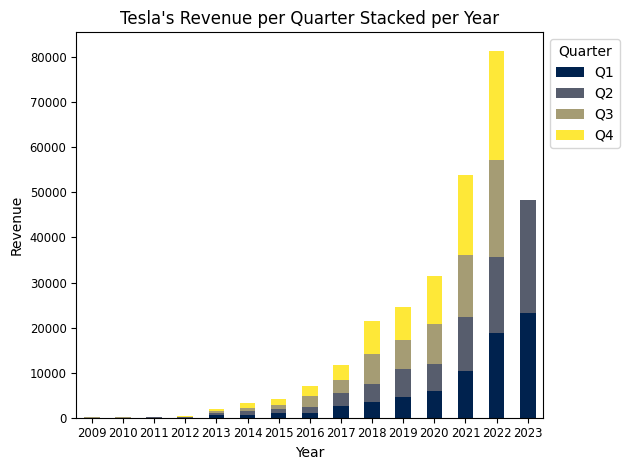

In [30]:
stacked.plot(kind='bar', stacked=True, colormap='cividis')
plt.title("Tesla's Revenue per Quarter Stacked per Year")
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend(title='Quarter', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0, fontsize='small')
plt.yticks(fontsize='small')
plt.tight_layout()
plt.show()